# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 


**DO NOT DELETE THIS CELL**


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment.If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.
9. Only Seaborn,numpy,pandas,sklearn,matplotlib packages will be allowed. Failing to abide will lead to a **-10 decrement in your scores.**
10. All visualizations (including scatter plots) should have at least 4-5 meaningful lines explaining about it. Failure to do so, will lead to reduction in marks.


## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


You have 3 dataset files . 
You need to submit this ipython file after renaming it. 
Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import pairwise_distances

#from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\Shraddha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = pd.read_csv('College.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [6]:
df.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [7]:
df = df.drop('Unnamed: 0', axis = 1) #dropping Unnamed 

In [8]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

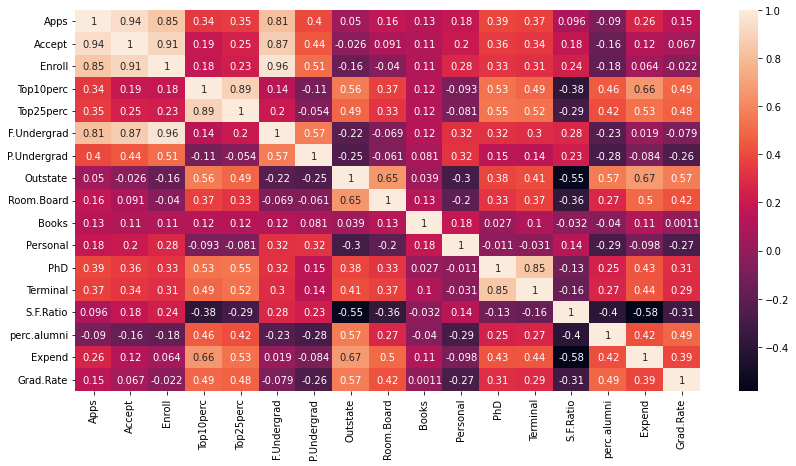

In [10]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

In [11]:
df1 = df.copy()

In [12]:
df1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
#droping object dtype to perfrom scaler operation
df = df.drop('Private', axis = 1)

In [27]:
# Compute cluster centers and predict cluster index for each sample 

#Scaler database
scaler = StandardScaler()
X_scaler = scaler.fit_transform(df)
X_scaler

#Normalize data
#X_normalized = normalize(X_scaler)
#X_normalized = pd.DataFrame(X_normalized)

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

## TASK 1: K-Means Clustering

## Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

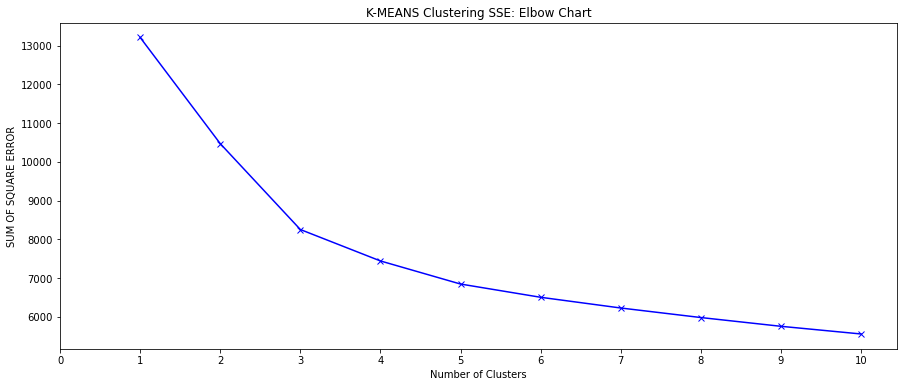

In [28]:
k_range = range(1,11)
inertias = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X_scaler)
    inertias.append(km.inertia_)
plt.figure(figsize=(15,6))
plt.plot(k_range,inertias,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SUM OF SQUARE ERROR')
plt.title('K-MEANS Clustering SSE: Elbow Chart')
plt.xticks(np.arange(0, 11, 1))
plt.show()

In [13]:
#as we can see the k before the plot get's linear is 3
#so our optimal k for our Data is k = 3

## Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2,3,4 and visualize the predicted training samples and actual training samples on scatter plots. Use 80% of the dataset for training and 20% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



### Task 1-b-1: Split the datasetand set the random_state as 2021 without fail

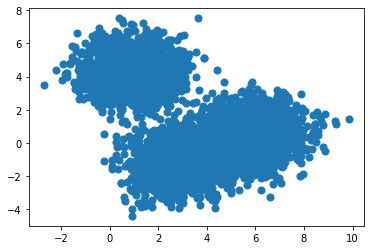

In [29]:
X, y = make_blobs(n_samples=5000, centers=3, n_features=5, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=50)
plt.scatter(X[:, 0], X[:, 1], s=50);

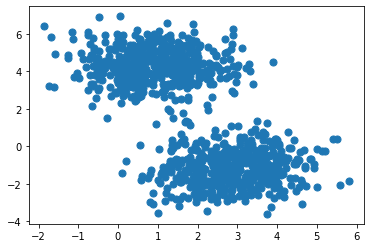

In [30]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=5, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=50)
plt.scatter(X[:, 0], X[:, 1], s=50);

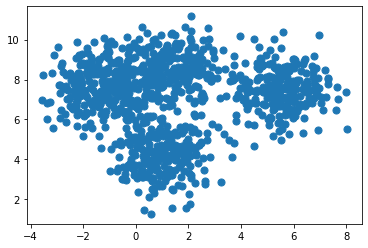

In [31]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=6, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=50)
plt.scatter(X[:, 0], X[:, 1], s=50);

### KMeans model

In [32]:
# Create the KMeans model
km = KMeans(n_clusters=3, random_state=10, max_iter=50000)
km.fit(X_train)

KMeans(max_iter=50000, n_clusters=3, random_state=10)

In [33]:
model = KMeans(5)
model.fit(df_scaler)
labels = model.labels_

In [34]:
model.cluster_centers_.shape

(5, 17)

In [35]:
model.cluster_centers_

array([[ 0.4931971 ,  0.12175675, -0.00664218,  1.92863267,  1.56671864,
        -0.13800395, -0.41757782,  1.80484961,  1.21726422,  0.29182899,
        -0.48424173,  1.14461564,  1.09974474, -1.22196736,  1.35778365,
         2.10516748,  1.14486867],
       [ 0.28564163,  0.33030032,  0.54595028, -0.52543545, -0.35438737,
         0.65352704,  0.77949378, -0.98336944, -0.64533673,  0.02715116,
         0.73402998,  0.24463962,  0.28262083,  0.94563166, -0.80367597,
        -0.55298514, -0.75995767],
       [ 2.40188969,  2.60217881,  2.6609654 ,  0.45596525,  0.60679972,
         2.67455521,  1.47475313, -0.41553321, -0.00851543,  0.3492083 ,
         0.70679827,  0.79971383,  0.74592571,  0.49351103, -0.47163627,
         0.09399849, -0.09181893],
       [-0.532815  , -0.52672293, -0.51868096, -0.62795285, -0.72665238,
        -0.4972866 , -0.27527774, -0.49829225, -0.50153497, -0.08386905,
        -0.02245888, -0.99581648, -1.01801244,  0.08510352, -0.36992578,
        -0.45972192

In [36]:
#Normalize database

X_normalized = normalize(X_scaler)
X_normalized = pd.DataFrame(X_normalized)

In [37]:
cluster_centroids = pd.DataFrame(data = model.cluster_centers_,columns = [X_normalized.columns])
cluster_centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.493197,0.121757,-0.006642,1.928633,1.566719,-0.138004,-0.417578,1.804850,1.217264,0.291829,-0.484242,1.144616,1.099745,-1.221967,1.357784,2.105167,1.144869
1,0.285642,0.330300,0.545950,-0.525435,-0.354387,0.653527,0.779494,-0.983369,-0.645337,0.027151,0.734030,0.244640,0.282621,0.945632,-0.803676,-0.552985,-0.759958
2,2.401890,2.602179,2.660965,0.455965,0.606800,2.674555,1.474753,-0.415533,-0.008515,0.349208,0.706798,0.799714,0.745926,0.493511,-0.471636,0.093998,-0.091819
3,-0.532815,-0.526723,-0.518681,-0.627953,-0.726652,-0.497287,-0.275278,-0.498292,-0.501535,-0.083869,-0.022459,-0.995816,-1.018012,0.085104,-0.369926,-0.459722,-0.489397
4,-0.310475,-0.274718,-0.352577,0.172311,0.264045,-0.385101,-0.293967,0.484666,0.416635,-0.096626,-0.321336,0.343658,0.374408,-0.253625,0.424738,0.053871,0.495085


### Model and fit the data to the PCA model


In [38]:
train_predict = km.predict(X_train)
train_predict

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0,
       1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1,
       2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2,
       2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2,

In [39]:
Y_train

array([1, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 1, 1, 0, 0, 3,
       0, 3, 1, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3, 0, 3, 1, 2, 1, 3, 2, 2, 0,
       3, 0, 3, 0, 1, 0, 0, 1, 3, 1, 0, 3, 1, 3, 0, 1, 3, 3, 2, 3, 1, 2,
       1, 0, 1, 2, 1, 0, 3, 3, 3, 2, 3, 3, 2, 3, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 0, 1, 3, 1, 3, 0,
       2, 0, 1, 1, 3, 3, 0, 0, 0, 3, 2, 3, 3, 2, 2, 0, 3, 2, 2, 0, 3, 1,
       0, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2, 1, 3, 0, 1, 0, 1, 1, 0, 0, 2, 2,
       3, 1, 1, 2, 0, 2, 3, 0, 2, 2, 0, 0, 1, 3, 1, 2, 3, 3, 3, 3, 1, 1,
       3, 2, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0, 2, 0, 3, 0, 1, 0, 3, 0, 2, 2,
       0, 1, 1, 1, 2, 3, 0, 3, 0, 1, 1, 3, 3, 2, 3, 3, 2, 0, 3, 0, 2, 2,
       0, 2, 3, 0, 1, 3, 2, 3, 2, 2, 2, 3, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0,
       0, 2, 3, 1, 2, 0, 3, 2, 1, 1, 3, 2, 0, 2, 2, 2, 3, 3, 0, 3, 0, 0,
       3, 1, 0, 2, 0, 3, 0, 1, 1, 0, 1, 2, 1, 1, 0, 3, 0, 3, 3, 2, 0, 2,
       1, 3, 2, 1, 2, 1, 0, 2, 1, 0, 1, 3, 0, 3, 0,

In [40]:
test_predict = km.predict(X_test)
test_predict

array([0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0,
       1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 0])

In [41]:
Y_test

array([2, 2, 1, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 1, 3, 2, 1, 0, 0, 0, 2, 2,
       1, 2, 0, 1, 1, 1, 3, 0, 0, 1, 2, 3, 3, 3, 2, 0, 2, 1, 0, 1, 0, 0,
       1, 1, 3, 0, 2, 0, 1, 3, 0, 1, 1, 3, 3, 0, 0, 2, 3, 0, 2, 3, 0, 1,
       1, 3, 3, 2, 3, 3, 3, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 2, 3, 0,
       0, 3, 0, 1, 2, 1, 1, 2, 0, 3, 3, 1, 3, 3, 2, 2, 1, 1, 2, 0, 3, 3,
       2, 1, 2, 2, 2, 1, 2, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1,
       0, 3, 2, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 0, 1, 2, 3, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 3, 3, 0, 3, 2, 0, 1, 0, 2, 3, 2, 2, 1, 2, 3,
       2, 0, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 0, 2, 0, 3, 2, 0, 2, 2, 2, 3,
       1, 2])

In [42]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Model and fit the data to the PCA model
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("original shape:   ", X_test.shape)

original shape:    (800, 6)
original shape:    (200, 6)


In [45]:
x = X_train[:, 0]
y = X_train[:, 1]

pca = PCA(2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
pca_train = pd.DataFrame(data = X_train, columns = ['component_1','component_2'])
pca_train

,component_1,component_2
0,-1.568721,-1.759656
1,-0.080473,0.285159
2,-0.874886,2.172498
3,-0.339489,-0.458123
4,-0.627200,-0.069043
...,...,...
795,3.276720,-0.054175
796,-1.391017,-1.298054
797,-1.844518,-1.420909
798,-0.888133,0.113812


In [46]:
pca_test = pd.DataFrame(data = X_test, columns = ['component_1','component_2'])
pca_test

,component_1,component_2
0,2.811836,-0.399525
1,3.016611,-0.446098
2,-1.467404,-1.672385
3,-0.773842,2.040601
4,-0.406115,0.280205
...,...,...
195,2.667945,-0.299763
196,2.681621,-0.561537
197,-0.396012,2.741324
198,-1.766140,-1.629931


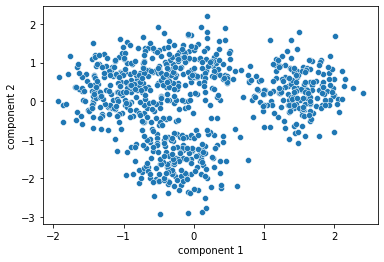

In [47]:
plt.figure(figsize=(6,4))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax = sns.scatterplot(x, y, data=pca_train, palette='bright')

### Task 1-b-2: Visualize the predicted training labels vs actual training labels


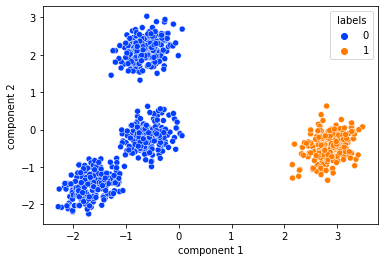

In [48]:
#Visualize training labels using K=2

kmeans= KMeans(n_clusters=2, n_init=10, init= 'k-means++', algorithm='full', max_iter=5000)
kmeans.fit(X_train)
labels= kmeans.labels_

#X_train = None
x = X_train[:, 0]
y = X_train[:, 1]

pca_df = pd.DataFrame(data=X_train, columns=['component_1','component_2'])
pca_train['labels']= labels

plt.figure(figsize=(6,4))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax = sns.scatterplot(x, y,hue='labels', data=pca_train, palette='bright')

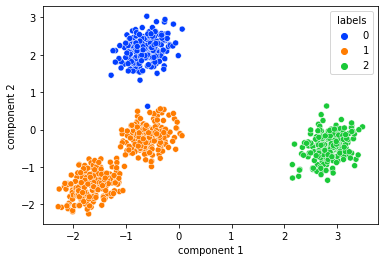

In [49]:
#Visualize training labels using K=3

kmeans= KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=5000)
kmeans.fit(X_train)
labels= kmeans.labels_

pca_df = pd.DataFrame(data=X_train, columns=['component_1','component_2'])
pca_train['labels']= labels

plt.figure(figsize=(6,4))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax = sns.scatterplot(x, y,hue='labels', data=pca_train, palette='bright')

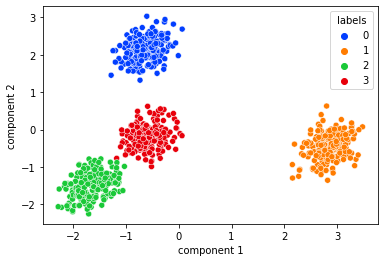

In [50]:
#Visualize training labels using K=4

kmeans= KMeans(n_clusters=4, n_init=10, init= 'k-means++', algorithm='full', max_iter=50000)
kmeans.fit(X_train)
labels= kmeans.labels_

pca_df = pd.DataFrame(data=X_train, columns=['component_1','component_2'])
pca_train['labels']= labels

plt.figure(figsize=(6,4))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax = sns.scatterplot(x, y,hue='labels', data=pca_train, palette='bright')

### Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

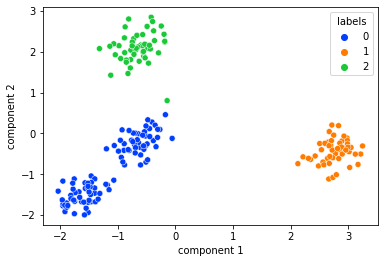

In [51]:
#Visualizing Testing labels using k=3

kmeans= KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=5000)
kmeans.fit(X_test)
labels= kmeans.labels_

pca_df = pd.DataFrame(data=X_test, columns=['component_1','component_2'])
pca_test['labels']= labels

x = X_test[:, 0]
y = X_test[:, 1]

plt.figure(figsize=(6,4))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax = sns.scatterplot(x, y,hue='labels', data=pca_test, palette='bright')

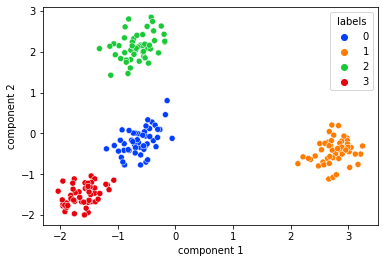

In [52]:
#Visualizing Testing labels using k=4

kmeans= KMeans(n_clusters=4, n_init=10, init= 'k-means++', algorithm='full', max_iter=5000)
kmeans.fit(X_test)
labels= kmeans.labels_

pca_df = pd.DataFrame(data=X_test, columns=['component_1','component_2'])
pca_test['labels']= labels

plt.figure(figsize=(6,4))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax = sns.scatterplot(x, y,hue='labels', data=pca_test, palette='bright')

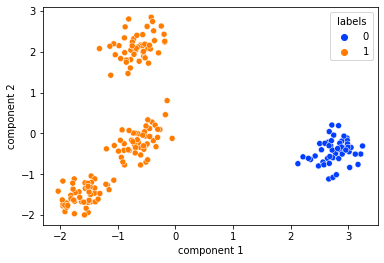

In [53]:
#Visualizing Testing labels using k=2

kmeans= KMeans(n_clusters=2, n_init=10, init= 'k-means++', algorithm='full', max_iter=5000)
kmeans.fit(X_test)
labels= kmeans.labels_

pca_df = pd.DataFrame(data=X_test, columns=['component_1','component_2'])
pca_test['labels']= labels

plt.figure(figsize=(6,4))
plt.xlabel('component 1')
plt.ylabel('component 2')
ax = sns.scatterplot(x, y,hue='labels', data=pca_test, palette='bright')

### Task 1-b-4: Print out a 2-D confusion matrix for all K values calculated above

In [54]:
kmeans = KMeans(2)
kmeans.fit(df1.drop('Private', axis=1))

KMeans(n_clusters=2)

In [55]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

In [57]:
df1['Private'] = df1.Private.astype("category").cat.codes
df1.Private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int8

In [58]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
print('\n-----CONFUSION MATRIX FOR K=2-----\n')
print(confusion_matrix(df1.Private, kmeans.labels_))
print('\n')
print('\n\t\t----CLASSIFICATION REPORT FOR K=2----\n')
print(classification_report(df1.Private, kmeans.labels_))


-----CONFUSION MATRIX FOR K=2-----

[[ 74 138]
 [ 34 531]]



		----CLASSIFICATION REPORT FOR K=2----

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [62]:
kmeans = KMeans(3)
kmeans.fit(df1.drop('Private', axis=1))

df1['Private'] = df1.Private.astype("category").cat.codes

print('\n-----CONFUSION MATRIX FOR K=3-----\n')
print(confusion_matrix(df1.Private, kmeans.labels_))
print('\n')
print('\n\t\t----CLASSIFICATION REPORT FOR K=3----\n')
print(classification_report(df1.Private, kmeans.labels_))


-----CONFUSION MATRIX FOR K=3-----

[[135  76   1]
 [430   7 128]
 [  0   0   0]]



		----CLASSIFICATION REPORT FOR K=3----

              precision    recall  f1-score   support

           0       0.24      0.64      0.35       212
           1       0.08      0.01      0.02       565
           2       0.00      0.00      0.00         0

    accuracy                           0.18       777
   macro avg       0.11      0.22      0.12       777
weighted avg       0.13      0.18      0.11       777



In [63]:
kmeans = KMeans(4)
kmeans.fit(df1.drop('Private', axis=1))

df1['Private'] = df1.Private.astype("category").cat.codes

print('\n-----CONFUSION MATRIX FOR K=4-----\n')
print(confusion_matrix(df1.Private, kmeans.labels_))
print('\n')
print('\n\t\t----CLASSIFICATION REPORT FOR K=4----\n')
print(classification_report(df1.Private, kmeans.labels_))


-----CONFUSION MATRIX FOR K=4-----

[[ 76   3 133   0]
 [  7 205 333  20]
 [  0   0   0   0]
 [  0   0   0   0]]



		----CLASSIFICATION REPORT FOR K=4----

              precision    recall  f1-score   support

           0       0.92      0.36      0.52       212
           1       0.99      0.36      0.53       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.36       777
   macro avg       0.48      0.18      0.26       777
weighted avg       0.97      0.36      0.53       777



# TASK 2: Hierarchical Agglomerative Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model
In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.

In [64]:
#Pairwise_distances of X_train with euclidean

initial_distances = pairwise_distances(X_train,metric='euclidean')
initial_distances

array([[0.        , 2.52906167, 3.99289952, ..., 0.43682185, 1.99325967,
        4.49752361],
       [2.52906167, 0.        , 2.04771613, ..., 2.45408246, 0.82563577,
        2.77716346],
       [3.99289952, 2.04771613, 0.        , ..., 3.72192956, 2.05872882,
        4.25545551],
       ...,
       [0.43682185, 2.45408246, 3.72192956, ..., 0.        , 1.80832509,
        4.65785355],
       [1.99325967, 0.82563577, 2.05872882, ..., 1.80832509, 0.        ,
        3.5552984 ],
       [4.49752361, 2.77716346, 4.25545551, ..., 4.65785355, 3.5552984 ,
        0.        ]])

In [65]:
#Pairwise_distances of X_train with cosine

initial_distances1 = pairwise_distances(X_train,metric='cosine')
initial_distances1

array([[0.        , 1.53765227, 1.44382369, ..., 0.01730517, 0.4348273 ,
        1.60511946],
       [1.53765227, 0.        , 0.00580362, ..., 1.37216672, 0.60827698,
        1.34593038],
       [1.44382369, 0.00580362, 0.        , ..., 1.27015429, 0.51156742,
        1.44486119],
       ...,
       [0.01730517, 1.37216672, 1.27015429, ..., 0.        , 0.29179644,
        1.74211733],
       [0.4348273 , 0.60827698, 0.51156742, ..., 0.29179644, 0.        ,
        1.99878632],
       [1.60511946, 1.34593038, 1.44486119, ..., 1.74211733, 1.99878632,
        0.        ]])

In [66]:
#Pairwise_distances of X_train with manhattan

initial_distances2 = pairwise_distances(X_train,metric='manhattan')
initial_distances2

array([[0.        , 3.53306379, 4.62599031, ..., 0.61454355, 2.55405691,
        5.77316601],
       [3.53306379, 0.        , 2.6817521 , ..., 3.47011241, 0.97900688,
        3.22602168],
       [4.62599031, 2.6817521 , 0.        , ..., 4.56303893, 2.0719334 ,
        5.90777378],
       ...,
       [0.61454355, 3.47011241, 4.56303893, ..., 0.        , 2.49110553,
        5.71021462],
       [2.55405691, 0.97900688, 2.0719334 , ..., 2.49110553, 0.        ,
        3.86233478],
       [5.77316601, 3.22602168, 5.90777378, ..., 5.71021462, 3.86233478,
        0.        ]])

#### Model and fit the training data to the AgglomerativeClustering model


In [67]:
#complete linkage + cosine
CC = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='complete')
y_CC = CC.fit_predict(X_train)

#complete linkage + euclidean
EC = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
y_EC = EC.fit_predict(X_train)

# complete linkage + manhattan
MC = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='complete')
y_MC = MC.fit_predict(X_train)

# average linkage + cosine
CA = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='average')
y_CA = CA.fit_predict(X_train)

# average linkage + euclidean
EA = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
y_EA = EA.fit_predict(X_train)

# average linkage + manhattan
MA = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='average')
y_MA = MA.fit_predict(X_train)


#### Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. 


In [68]:
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(df)
  
# Normalizing the data so that the data approximately 
X_normalized1 = normalize(X_scaled1)
# Converting the numpy array into a pandas DataFrame
X_normalized1 = pd.DataFrame(X_normalized1)

#Split database
X, y = make_blobs(n_samples=1000, centers=2, n_features=5, random_state=0)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, y, stratify=y, test_size=0.2, random_state=50)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train1)
# Apply transform to both the training set and the test set.
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)



In [71]:
# Confusion Matrix for complete linkage + euclidean
EC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')
y_EC = EC.fit_predict(X_test1)
print('Confusion Matrix for complete linkage + euclidean')
print(confusion_matrix(Y_test1, y_EC))

Confusion Matrix for complete linkage + euclidean
[[100   0   0]
 [  0  73  27]
 [  0   0   0]]


In [72]:
# Confusion Matrix for average linkage + euclidean
EA = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')
y_EA = EA.fit_predict(X_test1)
print('Confusion Matrix for average linkage + euclidean')
print(confusion_matrix(Y_test1, y_EA))

Confusion Matrix for average linkage + euclidean
[[  0  96   4]
 [100   0   0]
 [  0   0   0]]


In [73]:
# Confusion Matrix for average linkage + cosine

CA = AgglomerativeClustering(n_clusters = 3, affinity = 'cosine', linkage ='average')
y_CA = CA.fit_predict(X_test1)
print('Confusion Matrix for average linkage + cosine')
print(confusion_matrix(Y_test1, y_CA))

Confusion Matrix for average linkage + cosine
[[100   0   0]
 [  0  24  76]
 [  0   0   0]]


In [74]:
# Confusion Matrix for complete linkage + cosine
CC = AgglomerativeClustering(n_clusters = 3, affinity = 'cosine', linkage ='complete')
y_CC = CC.fit_predict(X_test1)
print('Confusion Matrix for complete linkage + cosine')
print(confusion_matrix(Y_test1, y_CC))

Confusion Matrix for complete linkage + cosine
[[100   0   0]
 [  0  45  55]
 [  0   0   0]]


In [75]:
# Confusion Matrix for complete linkage + manhattan
MC = AgglomerativeClustering(n_clusters = 3, affinity = 'manhattan', linkage ='complete')
y_MC = MC.fit_predict(X_test1)
print(' Confusion Matrix for complete linkage + manhattan')
print(confusion_matrix(Y_test1, y_MC))

 Confusion Matrix for complete linkage + manhattan
[[  0  74  26]
 [100   0   0]
 [  0   0   0]]


In [76]:
# Confusion Matrix for average linkage + cosine
MA = AgglomerativeClustering(n_clusters = 3, affinity = 'manhattan', linkage ='average')
y_MA = MA.fit_predict(X_test1)
print('Confusion Matrix for average linkage + cosine')
print(confusion_matrix(Y_test1, y_MA))

Confusion Matrix for average linkage + cosine
[[  0  99   1]
 [100   0   0]
 [  0   0   0]]


In [77]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
pred = cluster.fit_predict(X_test1)
f1_score_CC = f1_score(Y_test1, pred)

In [78]:
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
pred1 = cluster1.fit_predict(X_test1)
f1_score_CA = f1_score(Y_test1, pred1, 2)

cluster2 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
pred2 = cluster2.fit_predict(X_test1)
f1_score_MA = f1_score(Y_test1, pred2, 2)

cluster3 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
pred3 = cluster3.fit_predict(X_test1)
f1_score_MC = f1_score(Y_test1, pred3, 2)

cluster4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
pred4 = cluster4.fit_predict(X_test1)
f1_score_EC = round(f1_score(Y_test1, pred4), 2)

cluster5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
pred5 = cluster5.fit_predict(X_test1)
f1_score_EA = round(f1_score(Y_test1, pred5), 2)
#print("F1 Score for  complete linkage + cosine: {f1_score}".format(f1_score = f1_score_CC))

In [79]:
print("F1 Score for  complete linkage + cosine: {f1_score}".format(f1_score = f1_score_CC))
print("F1 Score for  average linkage + cosine: {f1_score}".format(f1_score = f1_score_CA))
print("F1 Score for  average linkage + manhattan: {f1_score}".format(f1_score = f1_score_MA))
print("F1 Score for  complete linkage + manhattan: {f1_score}".format(f1_score = f1_score_MC))
print("F1 Score for  complete linkage + euclidean: {f1_score}".format(f1_score = f1_score_EC))
print("F1 Score for  average linkage + euclidean: {f1_score}".format(f1_score = f1_score_EA))

F1 Score for  complete linkage + cosine: 0.0
F1 Score for  average linkage + cosine: 0.0
F1 Score for  average linkage + manhattan: 1.0
F1 Score for  complete linkage + manhattan: 1.0
F1 Score for  complete linkage + euclidean: 0.0
F1 Score for  average linkage + euclidean: 1.0


### Task 2-b: Visualize the predicted training labels vs actual training labels

In [80]:
pca = PCA(n_components = 2)
X_visualize = pca.fit_transform(X_train)
X_visualize = pd.DataFrame(X_visualize)
X_visualize.columns = ['P1', 'P2']

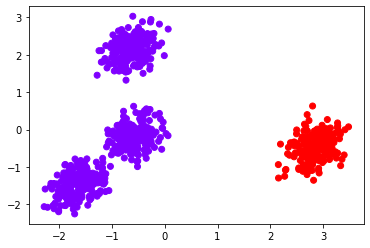

In [81]:
#Now clustering the data points
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster_labels=cluster.fit_predict(X_visualize)  
#print(cluster.labels_) 
#print(cluster_labels) 

plt.scatter(X_visualize['P1'],X_visualize['P2'], c=cluster_labels, cmap='rainbow')

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters
In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

### Kmeans Clustering
Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster label

In [82]:
kmeans = KMeans(5)
kmeans_lables = kmeans.fit_predict(X)
kmeans_lables

array([1, 2, 4, 2, 2, 1, 0, 0, 3, 1, 3, 1, 0, 3, 2, 2, 4, 4, 2, 3, 2, 1,
       1, 1, 2, 0, 1, 3, 1, 3, 0, 1, 4, 0, 3, 0, 1, 1, 4, 1, 2, 0, 2, 1,
       3, 2, 0, 1, 3, 1, 0, 1, 0, 0, 0, 4, 3, 3, 2, 2, 0, 3, 1, 0, 3, 1,
       3, 0, 1, 0, 4, 2, 3, 1, 4, 3, 4, 4, 3, 3, 0, 0, 3, 1, 0, 3, 3, 1,
       1, 2, 3, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 3, 3, 0, 4, 4, 3, 3, 0,
       4, 1, 4, 0, 1, 2, 1, 0, 0, 0, 4, 3, 3, 3, 2, 2, 4, 2, 1, 2, 4, 1,
       0, 2, 2, 4, 3, 1, 2, 2, 2, 2, 0, 2, 0, 3, 1, 1, 0, 2, 0, 0, 1, 3,
       3, 0, 3, 1, 3, 2, 2, 2, 2, 4, 4, 1, 3, 3, 0, 0, 3, 0, 2, 2, 2, 3,
       0, 1, 1, 2, 0, 2, 2, 3, 1, 4, 2, 1, 2, 2, 0, 3, 1, 4, 4, 1, 2, 1,
       0, 3, 4, 1, 0, 4, 0, 3, 4, 0, 2, 1, 3, 2, 2, 0, 1, 4, 1, 0, 0, 1,
       2, 3, 2, 2, 2, 4, 0, 3, 1, 0, 0, 0, 3, 3, 4, 4, 1, 2, 3, 4, 2, 1,
       4, 3, 1, 2, 3, 0, 0, 0, 1, 1, 0, 0, 1, 4, 0, 2, 3, 4, 2, 0, 2, 0,
       2, 4, 1, 2, 2, 4, 2, 2, 1, 2, 0, 2, 1, 1, 3, 2, 4, 4, 2, 0, 1, 0,
       1, 1, 0, 1, 4, 3, 1, 4, 1, 0, 3, 4, 3, 2, 1,

### Agglomerative Clustering
 Calculate pairwise distance matrix for X

 Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)


In [83]:
#Calculate pairwise distance matrix for X
X_distances = pairwise_distances(X , metric='euclidean')
X_distances

array([[ 0.        ,  3.22116001, 12.76539132, ...,  2.04155986,
         1.46701165,  2.65466299],
       [ 3.22116001,  0.        , 13.52091348, ...,  2.19133068,
         3.63568979,  3.40361932],
       [12.76539132, 13.52091348,  0.        , ..., 13.2610739 ,
        12.97965897, 14.78095722],
       ...,
       [ 2.04155986,  2.19133068, 13.2610739 , ...,  0.        ,
         2.04569665,  1.86209144],
       [ 1.46701165,  3.63568979, 12.97965897, ...,  2.04569665,
         0.        ,  2.17241271],
       [ 2.65466299,  3.40361932, 14.78095722, ...,  1.86209144,
         2.17241271,  0.        ]])

In [84]:
from sklearn.metrics.pairwise import pairwise_distances
X_distances = pairwise_distances(X_normalized,metric='euclidean')
X_distances

array([[0.00000000e+00, 1.47838756e+00, 1.28595690e+00, ...,
        1.35385003e+00, 1.76105368e+00, 1.19400026e+00],
       [1.47838756e+00, 0.00000000e+00, 1.07821094e+00, ...,
        1.29073618e+00, 1.53194676e+00, 1.58247097e+00],
       [1.28595690e+00, 1.07821094e+00, 2.10734243e-08, ...,
        1.19152263e+00, 1.63634379e+00, 1.49703756e+00],
       ...,
       [1.35385003e+00, 1.29073618e+00, 1.19152263e+00, ...,
        0.00000000e+00, 1.65555006e+00, 1.46536137e+00],
       [1.76105368e+00, 1.53194676e+00, 1.63634379e+00, ...,
        1.65555006e+00, 0.00000000e+00, 1.59945400e+00],
       [1.19400026e+00, 1.58247097e+00, 1.49703756e+00, ...,
        1.46536137e+00, 1.59945400e+00, 0.00000000e+00]])

In [123]:
#Model and fit the data to the Agglomerative 
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X)
agglo_labels

array([4, 2, 1, 2, 2, 4, 0, 0, 0, 4, 0, 2, 0, 0, 2, 2, 1, 1, 3, 0, 2, 4,
       4, 4, 2, 0, 4, 1, 4, 0, 0, 4, 1, 0, 0, 0, 3, 4, 1, 3, 2, 0, 3, 2,
       0, 3, 0, 3, 0, 4, 0, 4, 0, 0, 0, 1, 0, 0, 3, 2, 0, 0, 4, 0, 1, 4,
       0, 0, 4, 0, 0, 3, 0, 4, 1, 0, 1, 1, 0, 1, 0, 0, 0, 4, 0, 0, 0, 2,
       2, 2, 0, 4, 0, 3, 4, 4, 3, 4, 2, 3, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 4, 0, 0, 4, 2, 4, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 3, 3, 1, 3,
       0, 2, 2, 1, 0, 4, 2, 3, 2, 2, 0, 2, 0, 0, 4, 2, 0, 3, 0, 0, 4, 1,
       0, 0, 0, 4, 0, 3, 3, 2, 3, 1, 1, 4, 0, 0, 1, 0, 0, 0, 3, 2, 2, 0,
       1, 3, 4, 2, 0, 2, 3, 0, 4, 1, 2, 2, 2, 2, 0, 0, 4, 0, 1, 4, 3, 2,
       0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 2, 4, 0, 2, 3, 0, 3, 0, 2, 0, 0, 3,
       2, 0, 3, 2, 2, 1, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 3, 2, 1, 0, 2, 3,
       1, 0, 3, 3, 0, 0, 0, 0, 4, 4, 0, 0, 4, 1, 0, 2, 0, 1, 2, 0, 2, 0,
       3, 1, 2, 3, 2, 1, 4, 2, 3, 3, 0, 3, 4, 4, 0, 2, 1, 0, 2, 0, 4, 0,
       4, 4, 0, 2, 0, 0, 3, 0, 2, 0, 0, 1, 0, 2, 3,

In [85]:
kmeans = KMeans(5)
kmeans_lables = kmeans.fit_predict(X_normalized)
kmeans_lables

array([2, 0, 0, 3, 2, 0, 4, 3, 4, 0, 3, 3, 4, 4, 0, 2, 3, 0, 0, 2, 3, 1,
       0, 1, 3, 2, 4, 1, 0, 4, 0, 3, 2, 0, 4, 4, 3, 3, 0, 1, 4, 4, 2, 0,
       4, 2, 0, 0, 3, 2, 0, 0, 0, 0, 3, 4, 2, 2, 0, 1, 3, 1, 0, 1, 3, 0,
       2, 0, 4, 1, 3, 3, 3, 0, 3, 4, 4, 4, 1, 1, 4, 2, 2, 4, 4, 0, 3, 3,
       4, 0, 2, 3, 2, 2, 3, 0, 4, 0, 0, 4, 0, 4, 2, 2, 2, 0, 3, 0, 4, 4,
       4, 0, 2, 2, 3, 3, 0, 3, 1, 2, 4, 4, 3, 3, 4, 1, 0, 4, 0, 4, 4, 4,
       4, 0, 0, 0, 4, 3, 3, 3, 3, 1, 2, 4, 3, 0, 2, 0, 0, 3, 4, 4, 3, 0,
       0, 0, 0, 0, 3, 3, 0, 2, 3, 3, 3, 2, 0, 0, 0, 0, 2, 3, 3, 4, 3, 3,
       1, 2, 2, 0, 2, 2, 0, 0, 3, 4, 4, 4, 2, 0, 4, 3, 2, 4, 4, 2, 3, 2,
       0, 2, 3, 1, 2, 1, 0, 3, 2, 2, 0, 4, 0, 2, 0, 3, 0, 0, 0, 0, 1, 3,
       4, 3, 1, 1, 0, 3, 2, 3, 4, 0, 3, 0, 2, 1, 4, 0, 0, 3, 4, 4, 4, 0,
       3, 4, 4, 1, 4, 2, 4, 4, 3, 3, 0, 3, 4, 4, 3, 1, 4, 4, 4, 4, 0, 0,
       0, 0, 4, 2, 3, 1, 3, 0, 0, 1, 1, 2, 1, 1, 3, 1, 0, 2, 0, 4, 3, 2,
       0, 4, 1, 0, 2, 0, 3, 4, 4, 0, 3, 0, 1, 3, 2,

### Visualize Clusters
Model and fit the data to the PCA model 

X_pca = None

Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

In [86]:
pca = PCA(2)
pca.fit(X_train)
X_train = pca.transform(X_train)


In [87]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaler)
X_pca = pd.DataFrame(data=X_pca,columns=["PCA1","PCA2"])
X_pca.head()

,PCA1,PCA2
0,-1.592855,0.767333
1,-2.192402,-0.578829
2,-1.430964,-1.092819
3,2.855557,-2.630612
4,-2.212007,0.021631


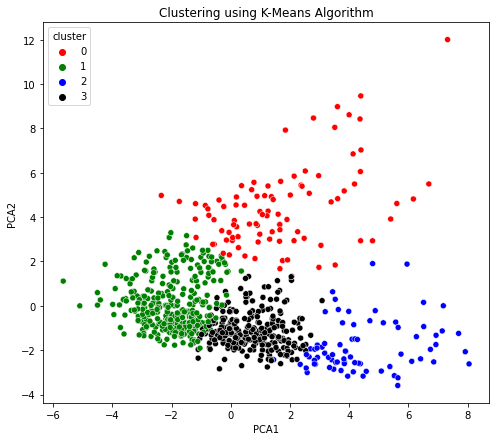

In [88]:
# apply kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(X_scaler)
pca_df_kmeans= pd.concat([X_pca,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
# visualize the clustered dataframe
plt.figure(figsize=(8,7))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

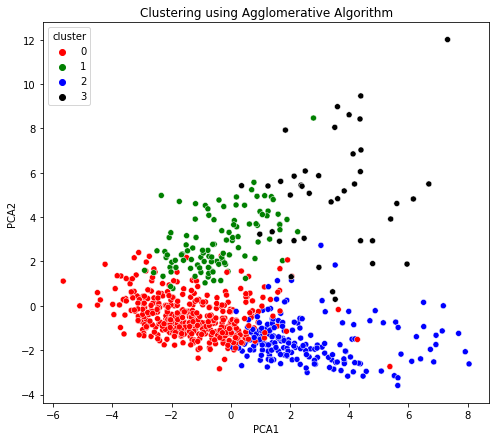

In [89]:
# apply Agglomerative clustering
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
y_pred = agglo_model.fit_predict(X_scaler)
pca_df_aglo= pd.concat([X_pca,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)
plt.figure(figsize=(8,7))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

# Task 3-b: Compare K-Means Clustering & Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

In [90]:
kmeans = KMeans(3)
kmeans.fit(df1.drop('Private', axis=1))

df1['Private'] = df1.Private.astype("category").cat.codes

print('\n-----CONFUSION MATRIX FOR K=4-----\n')
print(confusion_matrix(df1.Private, kmeans.labels_))
print('\n')
print('\n\t\t----CLASSIFICATION REPORT FOR K=4----\n')
print(classification_report(df1.Private, kmeans.labels_))


-----CONFUSION MATRIX FOR K=4-----

[[135   1  76]
 [430 128   7]
 [  0   0   0]]



		----CLASSIFICATION REPORT FOR K=4----

              precision    recall  f1-score   support

           0       0.24      0.64      0.35       212
           1       0.99      0.23      0.37       565
           2       0.00      0.00      0.00         0

    accuracy                           0.34       777
   macro avg       0.41      0.29      0.24       777
weighted avg       0.79      0.34      0.36       777



In [91]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=3)
y_pred = agglo_model.fit_predict(X_test1)
print('\n-----CONFUSION MATRIX FOR K=4-----\n')
print(confusion_matrix(Y_test1, y_pred))
print('\n\t\t----CLASSIFICATION REPORT FOR K=4----\n')
print(classification_report(Y_test1, y_pred))


-----CONFUSION MATRIX FOR K=4-----

[[100   0   0]
 [  0  64  36]
 [  0   0   0]]

		----CLASSIFICATION REPORT FOR K=4----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      0.64      0.78       100
           2       0.00      0.00      0.00         0

    accuracy                           0.82       200
   macro avg       0.67      0.55      0.59       200
weighted avg       1.00      0.82      0.89       200



K-Means, using a pre-specified  number of clusters, the method  assigns records to each cluster to  find the mutually exclusive cluster  of spherical shape based on distance. where Hierarchical methods can be agglomerative.

- Precision quantifies the number of positive class predictions that actually belong to the positive class.
- Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
- F-Score provides a single score that balances both the concerns of precision and recall in one number.

By compairing the K-Means Clustering & Hierarchical Agglomerative Clustering we oberved that Hierarchical Agglomerative Clustering is performing more better than k-means